Churn data analasis
1. importing the data to a variable df

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
df = pd.read_csv(r"C:\Users\noobj\OneDrive\Documents\AU\second_year\data_analytics\project\churn_1\data1\data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


doing some primary analysis .

In [41]:
df.shape

(7043, 21)

there are **7043 rows and 21 columns** in the csv file.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1) there are many outliers in contract 0 (which is one month).

    **this could indicate that there are miss labeled contract.**

In [43]:
df.describe()             

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


    checking for duplicate values.

In [44]:
df['customerID'].value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

    there are no duplicate values.

In [45]:
for i in df:
    if df[i].dtype == 'object':
        print(i,df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


    this shows all the unique values in each column.
    the total charges column is incorrectly stored as string value.

converting catogorical columns to numeric.
some values are 'no internet service' which is unessery, so replace them with 'no'.

In [46]:
df['MultipleLines'].replace({'No phone service': 'No'},inplace=True)
df['OnlineSecurity'].replace('No internet service' , 'No',inplace=True)
df['OnlineBackup'].replace('No internet service' , 'No',inplace=True)
df['DeviceProtection'].replace('No internet service' , 'No',inplace=True)
df['TechSupport'].replace('No internet service' , 'No',inplace=True) 
df['StreamingTV'].replace('No internet service' , 'No',inplace=True) 
df['StreamingMovies'].replace('No internet service' , 'No',inplace=True) 

C:\Users\noobj\AppData\Local\Temp\ipykernel_23816\412862742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].replace({'No phone service': 'No'},inplace=True)
C:\Users\noobj\AppData\Local\Temp\ipykernel_23816\412862742.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

    Total charges are supposed to be numeric, so converting them into the correct data type,
    there are some strings with spaces, an observation is the empty for the row with empty string the tenure is 0,
    thus i replace them with 0 as these customer have not used the service so have 0 total payment.

In [47]:
for index, value in df['TotalCharges'].items():
    if value.replace('.', '').isdigit() == False:
        print(f"Row {index}: {value} is not numeric")
        df.at[index, 'TotalCharges'] = 0.0
    else:
        df.at[index, 'TotalCharges'] = float(value)

Row 488:   is not numeric
Row 753:   is not numeric
Row 936:   is not numeric
Row 1082:   is not numeric
Row 1340:   is not numeric
Row 3331:   is not numeric
Row 3826:   is not numeric
Row 4380:   is not numeric
Row 5218:   is not numeric
Row 6670:   is not numeric
Row 6754:   is not numeric


there were **11 missing** values in total charges.

**EDA**
1) make a box plot for each numeric data ot check for outliers. (nothing intresting)
2) make bar chart for each catogarical data to check for abnormal distributions. (nothing intresting)

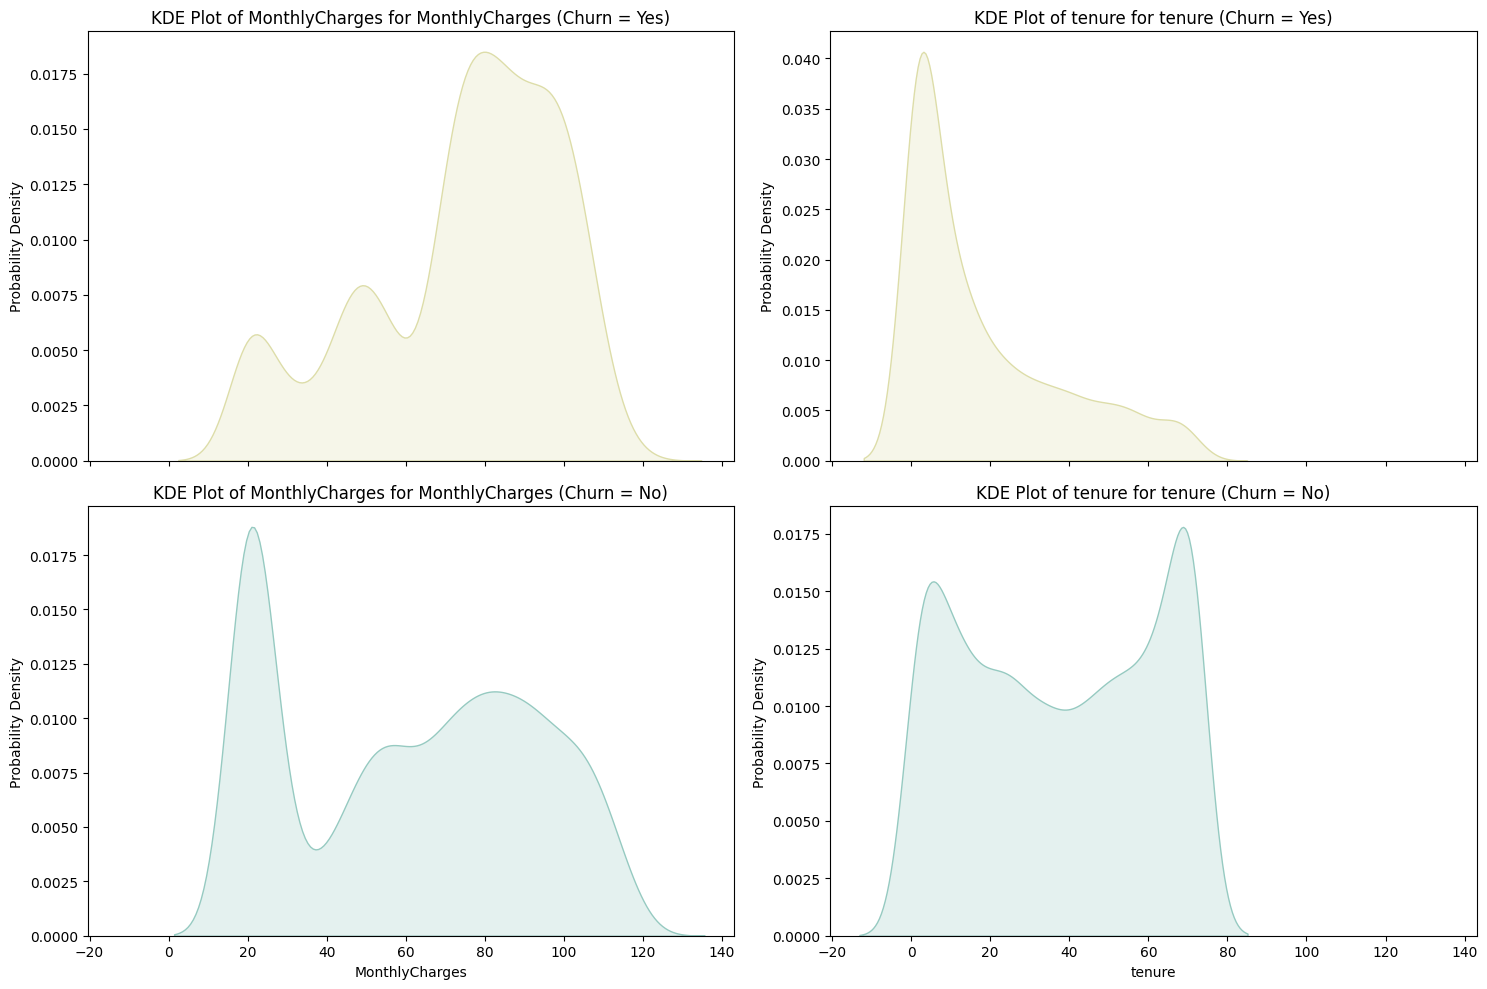

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)
for i, contract_value in enumerate(['MonthlyCharges','tenure']):
    sns.kdeplot(data=df[df['Churn'] == 'Yes'][contract_value], ax=axes[0, i], color='#DDDDA9',fill=True)
    axes[0, i].set_title(f'KDE Plot of {contract_value} for {contract_value} (Churn = Yes)')
    axes[0, i].set_xlabel(f'{contract_value}')
    axes[0, i].set_ylabel('Probability Density')

    sns.kdeplot(data=df[df['Churn'] == 'No'][contract_value], ax=axes[1, i], color='#96CAC1',fill=True)
    axes[1, i].set_title(f'KDE Plot of {contract_value} for {contract_value} (Churn = No)')
    axes[1, i].set_xlabel(f'{contract_value}')
    axes[1, i].set_ylabel('Probability Density')
plt.tight_layout()
plt.show()

    amoung the people who left mejority had low tenure and high monthlycharges.
    indicating new customers are likely to leave and higher monthly charges customers are likely to leave.

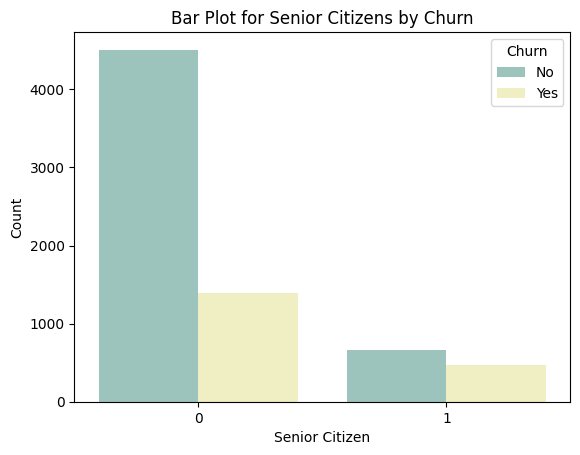

In [49]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df,palette=['#96CAC1','#F6F6BC'])
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Bar Plot for Senior Citizens by Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

    Senior citizens are twice as likely to churn.

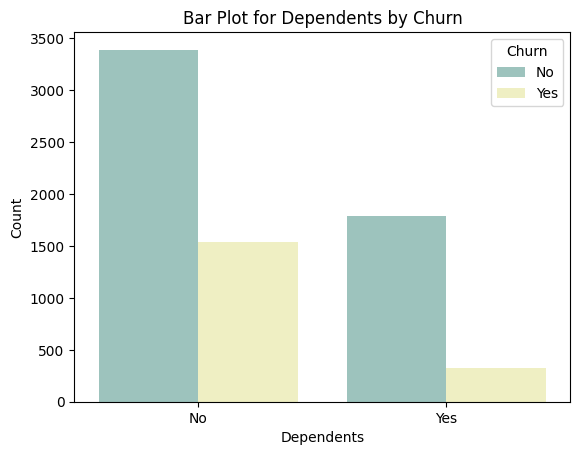

In [50]:
sns.countplot(x='Dependents', hue='Churn', data=df,palette=['#96CAC1','#F6F6BC'])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Bar Plot for Dependents by Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

    people without a dependents are twice as likely to churn.

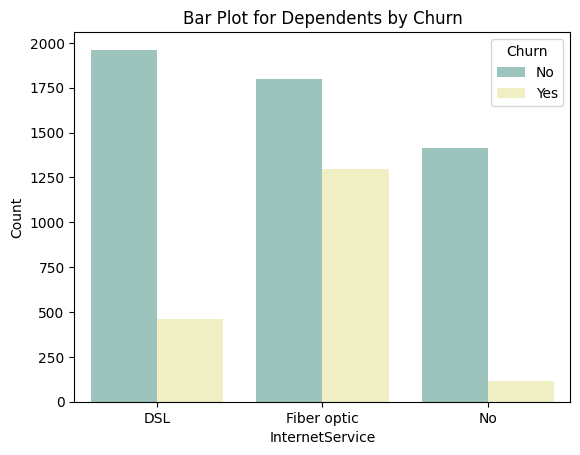

In [51]:
sns.countplot(x='InternetService', hue='Churn', data=df,palette=['#96CAC1','#F6F6BC'])
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Bar Plot for Dependents by Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


    Clients lacking internet(0) services exhibit a notably low churn rate, 
    while customers with fiber connections(2) are twice as likely to churn compared to those with DSL connections(1).

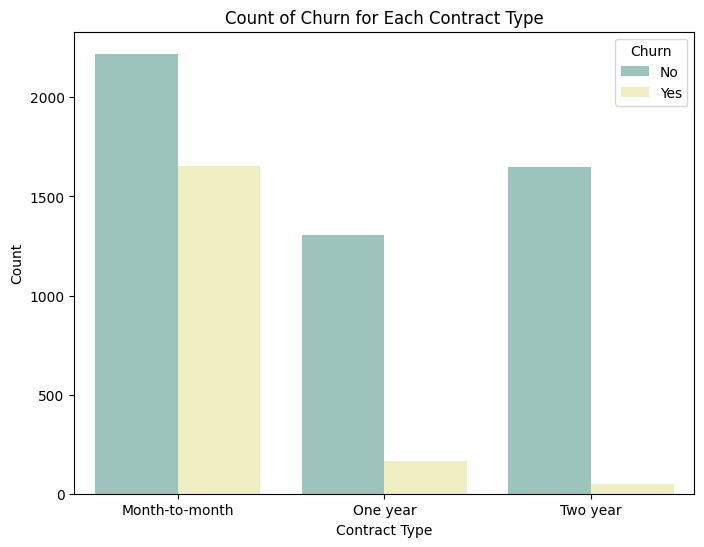

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df,palette=['#96CAC1','#F6F6BC'])
plt.title('Count of Churn for Each Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

    monthly customers are highly likely to churn.

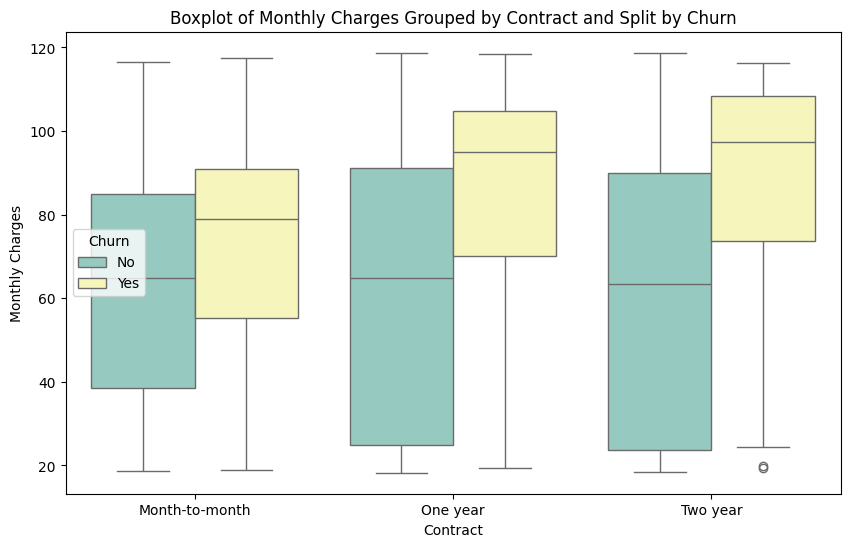

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='Set3')
plt.title('Boxplot of Monthly Charges Grouped by Contract and Split by Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()

    customers who churn had a higher monthly charges.
    specificaly there is a 20 unit diffrence in median of churn and non churn. the diffrence is 30 for people with yearly contracts.

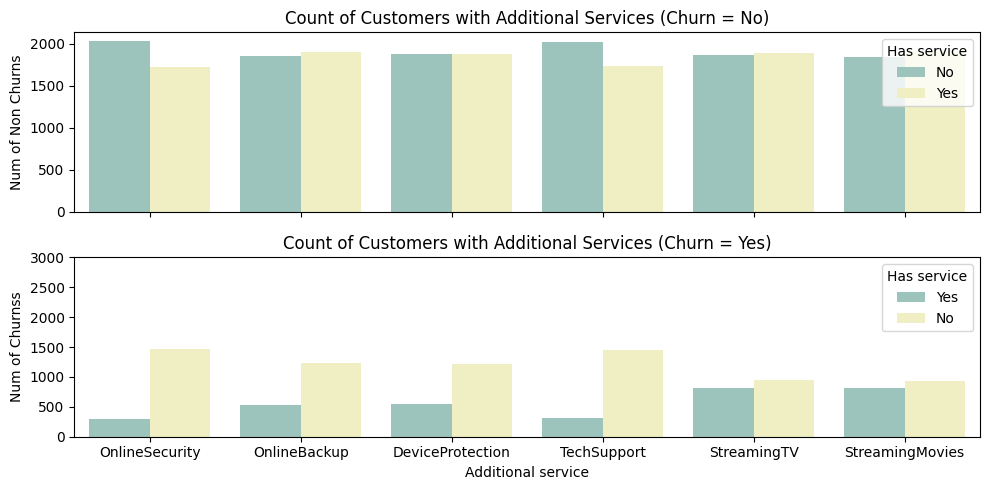

In [54]:
df1 = pd.melt(df[(df["InternetService"] != "No") & (df["Churn"] == 'No')], value_vars=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"])
df1.rename({'value': 'Has service'}, axis=1, inplace=True)
df2 = pd.melt(df[(df["InternetService"] != "No") & (df["Churn"] == 'Yes')], value_vars=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"])
df2.rename({'value': 'Has service'}, axis=1, inplace=True)
df1.head()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), sharex=True)
sns.countplot(data=df1, x='variable', hue='Has service', ax=ax1,palette=['#96CAC1','#F6F6BC'])
ax1.set(xlabel='Additional service', ylabel='Num of Non Churns')
ax1.set_title('Count of Customers with Additional Services (Churn = No)')
sns.countplot(data=df2, x='variable', hue='Has service', ax=ax2,palette=['#96CAC1','#F6F6BC'])
ax2.set(xlabel='Additional service', ylabel='Num of Churnss')
ax2.set_title('Count of Customers with Additional Services (Churn = Yes)')
ax2.set_ylim(0, 3000)
plt.tight_layout()
plt.show()

    people who have StreamingTv and steaming Movies are likely to churn.
    people who have online security and techsupport are less likely to churn.

In [55]:
for i in list(df.select_dtypes(include='object').columns):
    contingency_table = pd.crosstab(df[i], df['Churn'])

    # No Performing the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"\nChi-Square Test Results: {i}")
    print("Chi-Square Statistic: {:.4f}".format(chi2))
    print("P-value: {:.4f}".format(p_value))

    contingency_table = pd.crosstab(df[i], df['Churn'])



Chi-Square Test Results: customerID
Chi-Square Statistic: 7043.0000
P-value: 0.4944

Chi-Square Test Results: gender
Chi-Square Statistic: 0.4841
P-value: 0.4866

Chi-Square Test Results: Partner
Chi-Square Statistic: 158.7334
P-value: 0.0000

Chi-Square Test Results: Dependents
Chi-Square Statistic: 189.1292
P-value: 0.0000

Chi-Square Test Results: PhoneService
Chi-Square Statistic: 0.9150
P-value: 0.3388

Chi-Square Test Results: MultipleLines
Chi-Square Statistic: 11.1433
P-value: 0.0008

Chi-Square Test Results: InternetService
Chi-Square Statistic: 732.3096
P-value: 0.0000

Chi-Square Test Results: OnlineSecurity
Chi-Square Statistic: 205.6331
P-value: 0.0000

Chi-Square Test Results: OnlineBackup
Chi-Square Statistic: 47.2609
P-value: 0.0000

Chi-Square Test Results: DeviceProtection
Chi-Square Statistic: 30.5134
P-value: 0.0000

Chi-Square Test Results: TechSupport
Chi-Square Statistic: 190.1668
P-value: 0.0000

Chi-Square Test Results: StreamingTV
Chi-Square Statistic: 27.862

based on  chi square gender, phone service is bad columns.

In [56]:
continuous_features = list(df.select_dtypes(include='number').columns )

target_variable = 'Churn'

# Perform ANOVA for each continuous feature
for feature in continuous_features:
    # Group data by the target variable categories
    group1 = df[df[target_variable] == 'No'][feature]         
    group2 = df[df[target_variable] == 'Yes'][feature]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(group1,  group2)

    print(f"ANOVA for '{feature}':")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print()

ANOVA for 'SeniorCitizen':
F-statistic: 164.0414
P-value: 0.0000

ANOVA for 'tenure':
F-statistic: 997.2680
P-value: 0.0000

ANOVA for 'MonthlyCharges':
F-statistic: 273.4637
P-value: 0.0000



for ANOVA test on (SeniorCitizen,tenure,MonthlyCharges)

**Feature selection**

    intresting columns to consider based on EDA: 
    Contract
    online security and techsupport
    StreamingTv and steaming Movies
    MonthlyCharges
    tenure
    SeniorCitizen
    Dependents
    InternetService

In [57]:
df_new = df[['Contract','MonthlyCharges','tenure','Dependents','SeniorCitizen','InternetService','StreamingTV','StreamingMovies','TechSupport','OnlineSecurity','Churn']]

In [58]:
df_new.to_csv('churn1_new.csv')